# Singular Value Decomposition

## Filip Ślazyk

# Low rank approximation

In [ ]:
import sys
!{sys.executable} -m pip install imageio

In [1]:
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
def first_k_values(k, U, sigma, V):
    for i in range(k, len(sigma)):
        sigma[i]=0
    return U, sigma, V

In [3]:
def compression(image, k):
    U, sigma, V = np.linalg.svd(image)
    U, sigma, V = first_k_values(k, U, sigma, V)
    return U @ np.diag(sigma) @ V

In [4]:
def show_compressed(k):
    image = imageio.imread('Lena_gray.JPG', as_gray=True)
    plt.imshow(compression(image, k))
    plt.show()
    

In [5]:
def show_difference(k):
    image = imageio.imread('Lena_gray.JPG', as_gray=True)
    difference = np.abs(image - compression(image, k))
    diff = float(np.sum(np.sum(difference)))/float(np.sum(np.sum(image)))
    coef = k/512
    plt.imshow(difference)
    plt.show()
    return coef, diff

compression for k =  1 eigenvalues


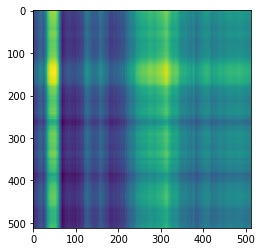

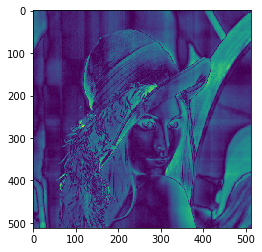

compression for k =  3 eigenvalues


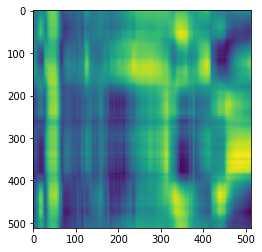

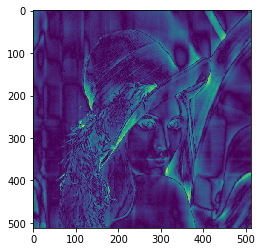

compression for k =  4 eigenvalues


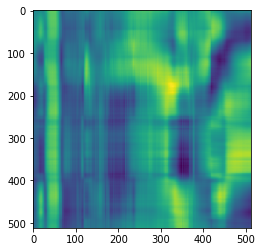

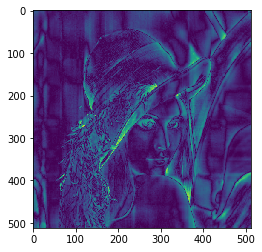

compression for k =  7 eigenvalues


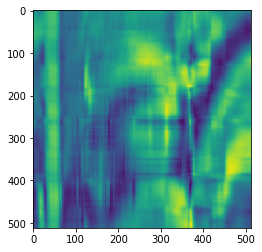

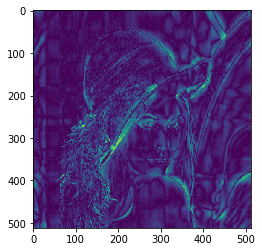

compression for k =  10 eigenvalues


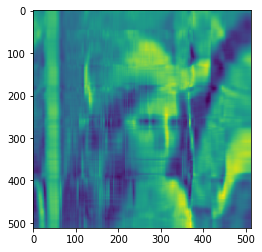

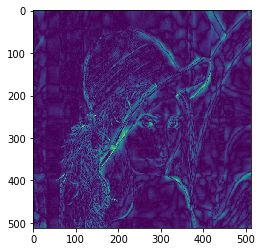

compression for k =  20 eigenvalues


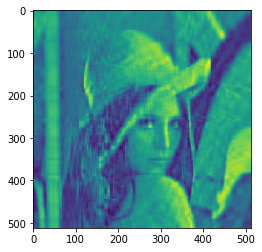

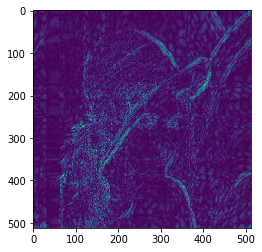

compression for k =  40 eigenvalues


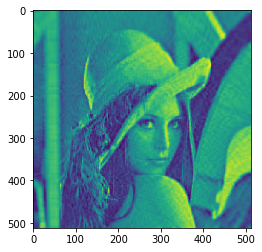

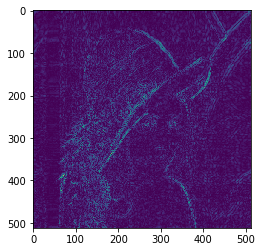

compression for k =  80 eigenvalues


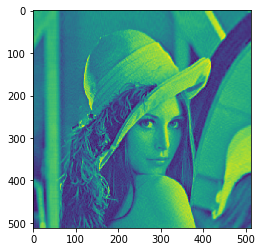

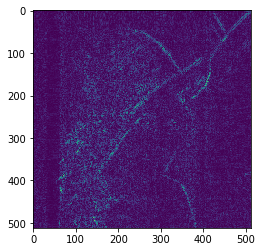

compression for k =  160 eigenvalues


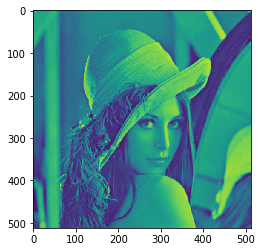

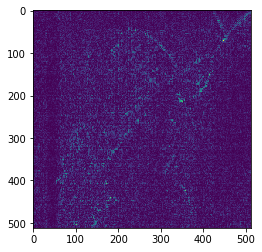

compression for k =  320 eigenvalues


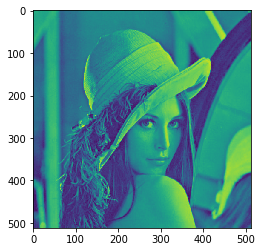

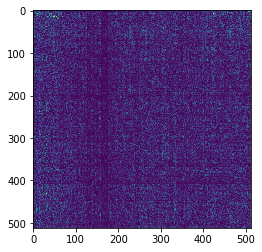

compression for k =  512 eigenvalues


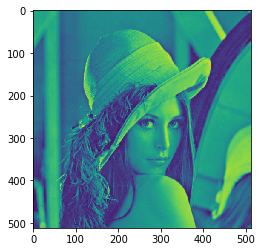

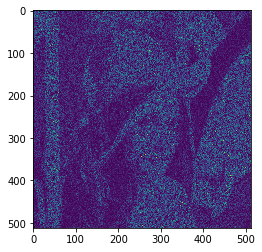

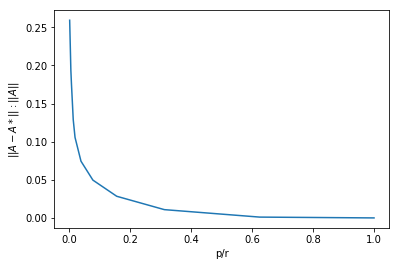

In [6]:
x = []
y = []
for k in [1,3,4,7,10, 20, 40, 80, 160, 320, 512]:
    print('compression for k = ',k,'eigenvalues')
    show_compressed(k)
    coef, diff = show_difference(k)
    x.append(coef)
    y.append(diff)

plt.ylabel('$||A-A*||:||A||$')
plt.xlabel('p/r')
plt.plot(x,y)
plt.show()

# Przekształcenie sfery w elipsoidę 

In [150]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [151]:
def generate_sphere(points_count):
    s = [(2 * np.pi) * np.random.random() for i in range(points_count)]
    t = [np.pi * np.random.random() for i in range(points_count)]
    X = np.cos(s)*np.sin(t)
    Y = np.sin(s)*np.sin(t)
    Z = np.cos(t)
    return X, Y, Z

In [152]:
def generate_A():
    return np.random.rand(3,3)

## 1. Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D

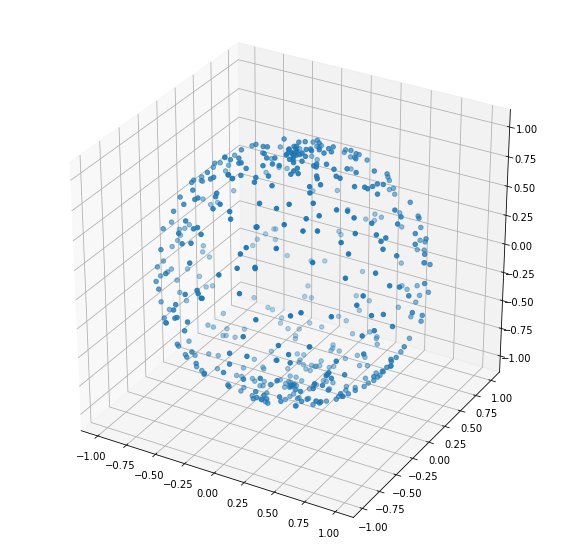

In [153]:
X, Y, Z = generate_sphere(500)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X, Y, Z)

## 2. Wygeneruj 3 różne macierze $A_1, A_2, A_3, (A_i \in R^{3×3} )$, za ich pomocą dokonaj przekształcenia sfery w elipsoidę, a następnie przedstaw wizualizację uzyskanego wyniku.

(-1.2, 1.2)

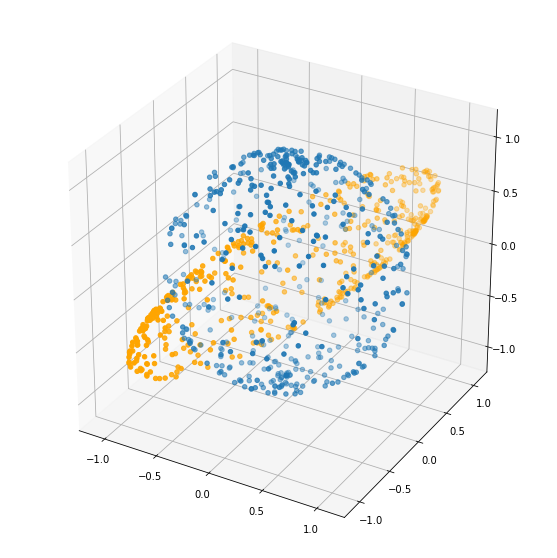

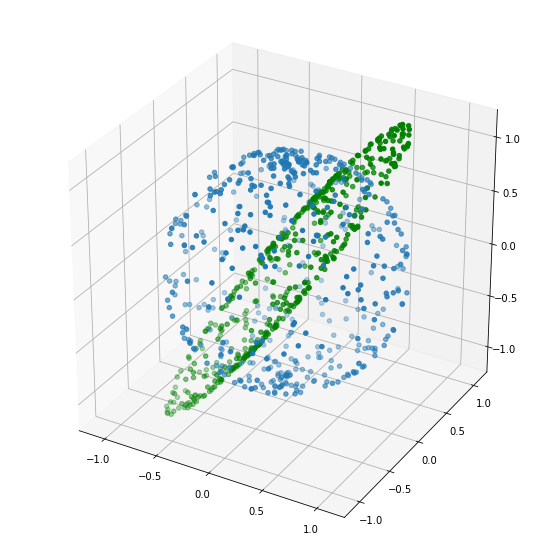

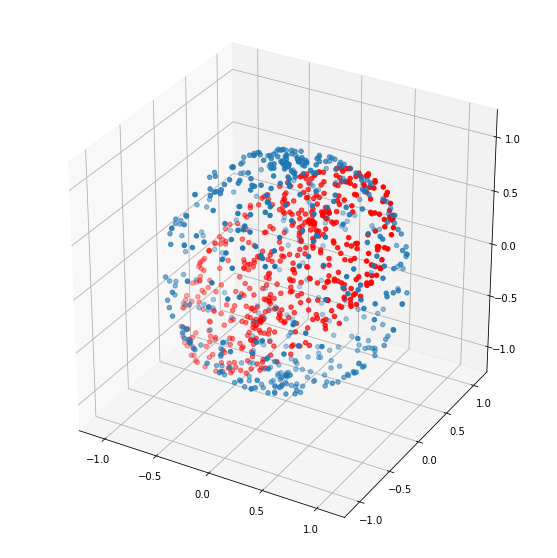

In [146]:
A1 = generate_A()
A2 = generate_A()
A3 = generate_A()
S = np.row_stack([X, Y, Z])
E1 =A1 @ S
E2 =A2 @ S
E3 =A3 @ S

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E1[0], E1[1], E1[2], color='orange')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E2[0], E2[1], E2[2], color='green')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E3[0], E3[1], E3[2], color='red')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)


## 3. Dokonaj rozkładu według wartości osobliwych (SVD) każdej macierzy $A_i$ . Na wykresie elipsoidy odpowiadającej przekształceniu $A_i$ dodaj wizualizację jej półosi wyznaczonych za pomocą SVD.

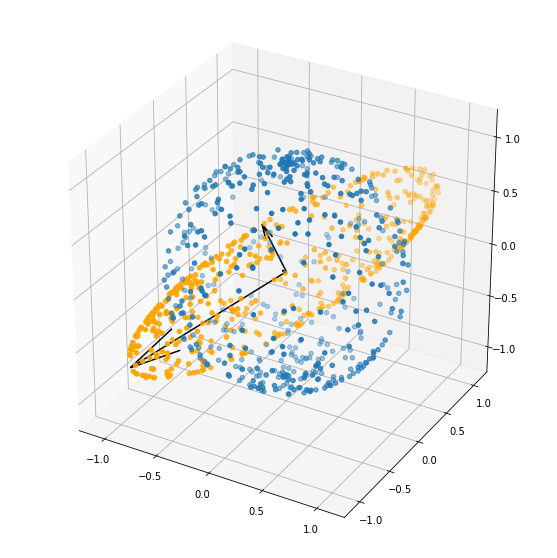

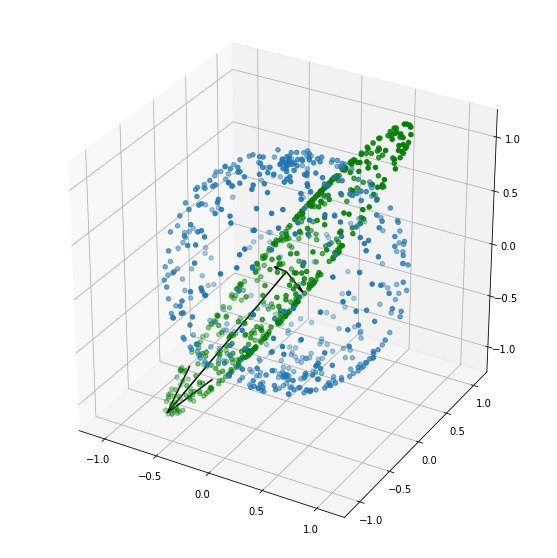

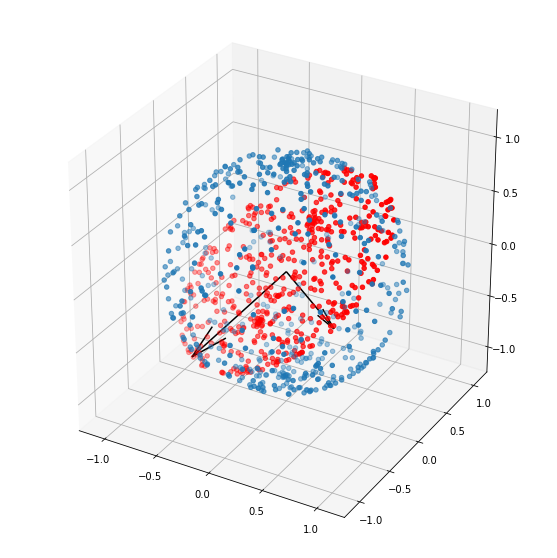

In [157]:
S = np.row_stack([X, Y, Z])

E1 = A1 @ S
E2 = A2 @ S
E3 = A3 @ S

U1, sigma1, V1 = np.linalg.svd(A1)
U2, sigma2, V2 = np.linalg.svd(A2)
U3, sigma3, V3 = np.linalg.svd(A3)


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E1[0], E1[1], E1[2], color='orange')
x0, y0, z0 = [[0] * 3] * 3
aX = [0] * 3
aY = [0] * 3
aZ = [0] * 3

ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)

for i, s1 in enumerate(np.diag(sigma1)):
    a = np.dot(U1, s1)
    aX[i] = a[0]
    aY[i] = a[1]
    aZ[i] = a[2]
ax.quiver(x0, y0, z0, aX, aY, aZ, color='black')


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E2[0], E2[1], E2[2], color='green')
x0, y0, z0 = [[0] * 3] * 3
aX = [0] * 3
aY = [0] * 3
aZ = [0] * 3

ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)

for i, s2 in enumerate(np.diag(sigma2)):
    a = np.dot(U2, s2)
    aX[i] = a[0]
    aY[i] = a[1]
    aZ[i] = a[2]
ax.quiver(x0, y0, z0, aX, aY, aZ, color='black')


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E3[0], E3[1], E3[2], color='red')
x0, y0, z0 = [[0] * 3] * 3
aX = [0] * 3
aY = [0] * 3
aZ = [0] * 3

ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)

for i, s3 in enumerate(np.diag(sigma3)):
    a = np.dot(U3, s3)
    aX[i] = a[0]
    aY[i] = a[1]
    aZ[i] = a[2]
ax.quiver(x0, y0, z0, aX, aY, aZ, color='black')



## 4. Znajdź taką macierz $A_i$, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę.

[1.53840974 0.13501795 0.00726833]


(-1.2, 1.2)

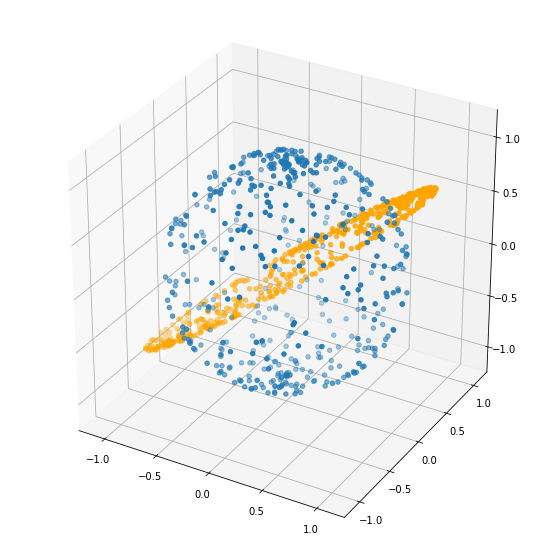

In [148]:
S = np.row_stack([X, Y, Z])
A = generate_A()
U, sigma, V = np.linalg.svd(A)

while(sigma[0] / sigma[2] < 100):
    A = generate_A()
    U, sigma, V = np.linalg.svd(A)

print(sigma)

E1 =A @ S

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E1[0], E1[1], E1[2], color='orange')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)

## 5. Dla wybranej macierzy Ai przedstaw wizualizacje $S{V_i}^T$,  $S\Sigma{V_i}^T$ oraz $SU_i\Sigma{V_i}^T$,  gdzie $A_i = U_i\Sigma{V_i}^T$ ,  a $S$ oznacza sferę z punktu 1. 1

(-1.2, 1.2)

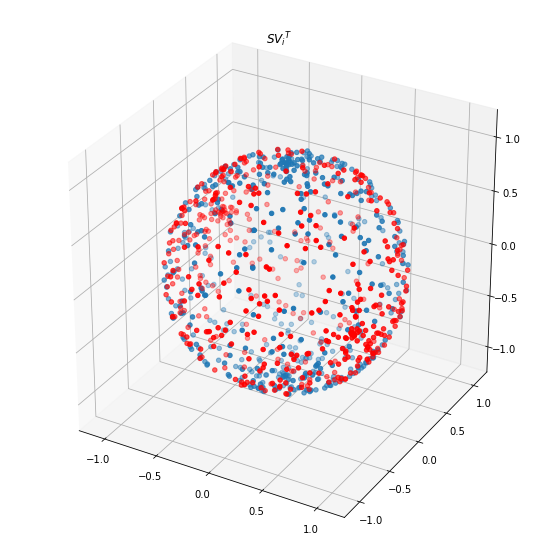

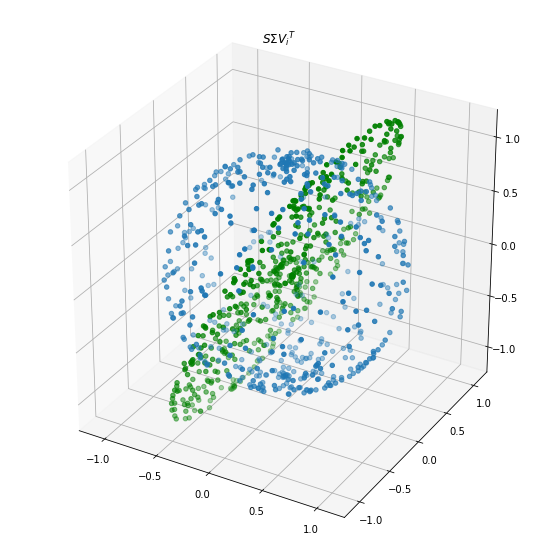

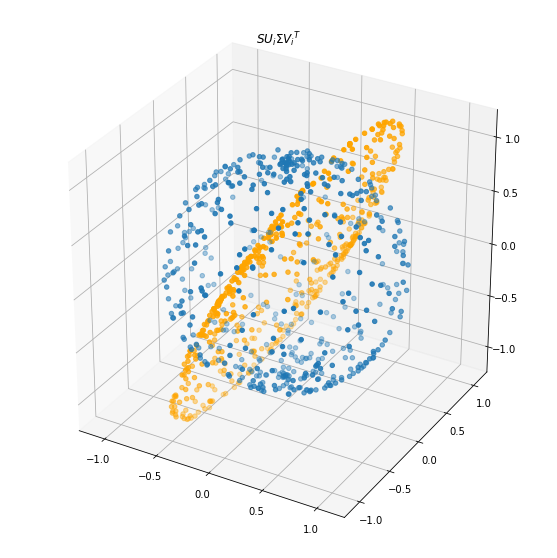

In [156]:
S = np.row_stack([X, Y, Z])

U, sigma, V = np.linalg.svd(A1)

E1 = S.transpose() @ V
E1 = E1.transpose()

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_title('$S{V_i}^T$')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E1[0], E1[1], E1[2], color='red')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)


E1 = S.transpose()* sigma @ V
E1 = E1.transpose()

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_title('$S\Sigma{V_i}^T$')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E1[0], E1[1], E1[2], color='green')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)

E1 = S.transpose() @ U * sigma @ V
E1 = E1.transpose()

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_title('$SU_i\Sigma{V_i}^T$')
ax.set_aspect('equal')
ax.scatter(X, Y, Z)
ax.scatter(E1[0], E1[1], E1[2], color='orange')
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)
